In [44]:
# Dataframes implement the Pandas API
import dask.dataframe as dd

from dask import delayed

In [3]:
from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:53597 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


### 1. Parallelize the following code using the @delayed decorator of Dask and derive the task execution graph.

In [32]:
@delayed
#takes a list of numbers as input
def sum_up(l): 
    return sum(l)

@delayed
def cube(n):
    return n**3

In [41]:
total = []

for i in range(1,10):
    total.append(cube(i))

result = sum_up(total)

result

Delayed('sum_up-b242222e-6644-492e-ba28-c44152717281')

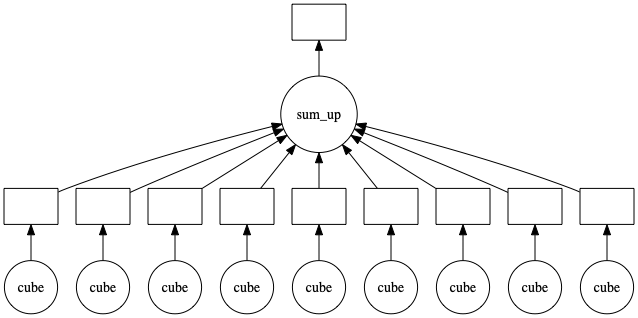

In [47]:
result.visualize()

In [45]:
result.compute()

Delayed('sum-c67df6e1-c0e3-48d1-9300-63f53de2e39d')

### 2. Parallelize the following code using the @delayed decorator of Dask and derive the task execution graph.

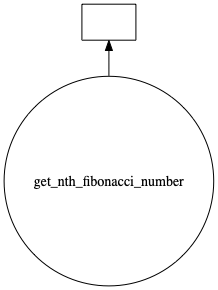

In [40]:
# first two fibonacci numbers
fibonacci_nums = [1,1]

@delayed
# returns the nth fibonacci number
def get_nth_fibonacci_number(n):
    if n == 1:
        return fibonacci_nums[0]
    elif n == 2:
        return fibonacci_nums[1]
    else:
        return get_nth_fibonacci_number(n-1) + get_nth_fibonacci_number(n-2)

result1 = get_nth_fibonacci_number(10)

result1.visualize()
    
    
    

In [48]:
result1.compute()

Delayed('add-40027e85a6dba11a849d26c375501cad')